In [10]:
# interactive plots in Jupyter, used to show plots inline in the notebook
%matplotlib inline

# The networkx library
import networkx as nx

# Numpy for enhanced math array management
import numpy as np

# statistical tools (we only use ECDF)
from statsmodels.distributions.empirical_distribution import ECDF

# Mathematical plotting
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# use to control whether to show the entire cell output or only the last_expr (default)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# to generate random numbers
from random import *

# to fit power law distributions
from powerlaw import *

In [19]:
# Import graph
graph_days = nx.read_pajek('Days.net')
print(type(graph_days))

<class 'networkx.classes.multigraph.MultiGraph'>


In [20]:
print(graph_days)

MultiGraph with 13332 nodes and 243447 edges


In [21]:
# Import graph
EAT_graph = nx.read_pajek('EATnew.net')
print(type(EAT_graph))

<class 'networkx.classes.multidigraph.MultiDiGraph'>


In [22]:
print(EAT_graph)

MultiDiGraph named 'EATnew\r' with 23219 nodes and 325593 edges


In [24]:
# Check whether the graph is connected or not
nx.is_strongly_connected(EAT_graph)
nx.is_weakly_connected(EAT_graph)

False

True

In [27]:
EAT_graph_conn_comp = list(nx.weakly_connected_components(EAT_graph))
len(EAT_graph_conn_comp)

1

In [28]:
EAT_graph_GC = nx.subgraph(EAT_graph, max(EAT_graph_conn_comp, key=len))

print(EAT_graph_GC) # number of nodes and edges in the GC

# number of vertices and edges in the original graph
print(EAT_graph)

# number of clusters
nx.number_weakly_connected_components(EAT_graph)

# sizes (sorted, first 20 elements)
[len(c) for c in sorted(EAT_graph_conn_comp, key=len, reverse=True)][0:9]

MultiDiGraph named 'EATnew\r' with 23219 nodes and 325593 edges
MultiDiGraph named 'EATnew\r' with 23219 nodes and 325593 edges


1

[23219]

In [30]:
# Select only nodes with degree > 100 from the FB Giant Component
vs = [n for n in list(EAT_graph_GC.nodes) if EAT_graph_GC.degree(n) > 100]

# "Induced" subgraph: graph composed by
# - a set of vertices (from the original graph)
# - only the edges connecting those vertices (in the original subgraph)
EAT_g_sub = EAT_graph_GC.subgraph(vs)

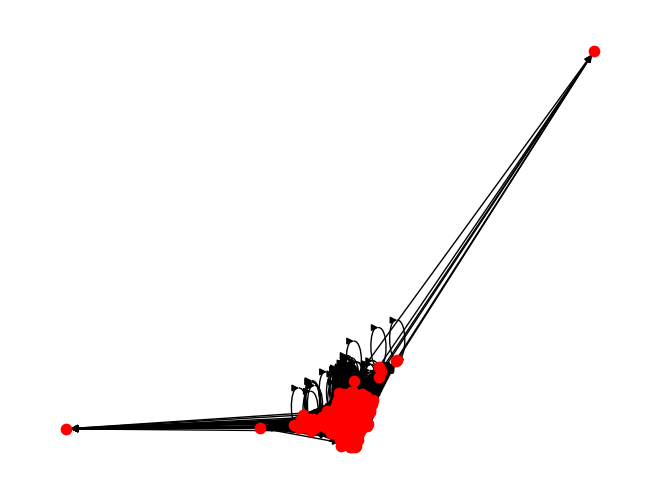

In [31]:
# Example with the Facebook induced graph with nodes having degree > 100

# Beautyfying the the plot with some visual style attributes
# - define a dictionary for setting the required options
# - use the dictionary as the plot parameter

try:
    del visual_style
    visual_style = {}
except NameError:
    visual_style = {}
    
# visual_style["bbox"] = (600,600)
visual_style["with_labels"] = False
visual_style["node_size"] = 55 #default 300
visual_style["node_color"] = 'red'
visual_style["node_shape"] = 'o'
visual_style["arrowsize"] = 10 # 10 default
visual_style["pos"] = nx.spring_layout(EAT_g_sub, seed = 20) # the spring layout is the default one used by draw

nx.draw(EAT_g_sub, **visual_style)